In [21]:
import pandas as pd
import os

# Read the combined CSV file
residuals_data = pd.read_csv(os.path.join('..', 'assets', 'combined_daily_ridership_residuals.csv'))

# Convert 'Date' column to datetime if it exists
if 'Date' in residuals_data.columns:
    residuals_data['Date'] = pd.to_datetime(residuals_data['Date'])


In [22]:
# Trim off data older than 2022-02-01
start_date = pd.to_datetime('2022-02-01')

# Remove rows before start_date
residuals_data = residuals_data[residuals_data['Date'] >= start_date]

print(f"Data trimmed to start from {start_date.strftime('%Y-%m-%d')}")

# Display the date range after trimming
date_range = residuals_data['Date']
print(f"Data range: {date_range.min().strftime('%Y-%m-%d')} to {date_range.max().strftime('%Y-%m-%d')}")


Data trimmed to start from 2022-02-01
Data range: 2022-02-01 to 2024-09-30


/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_47052/3795354018.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


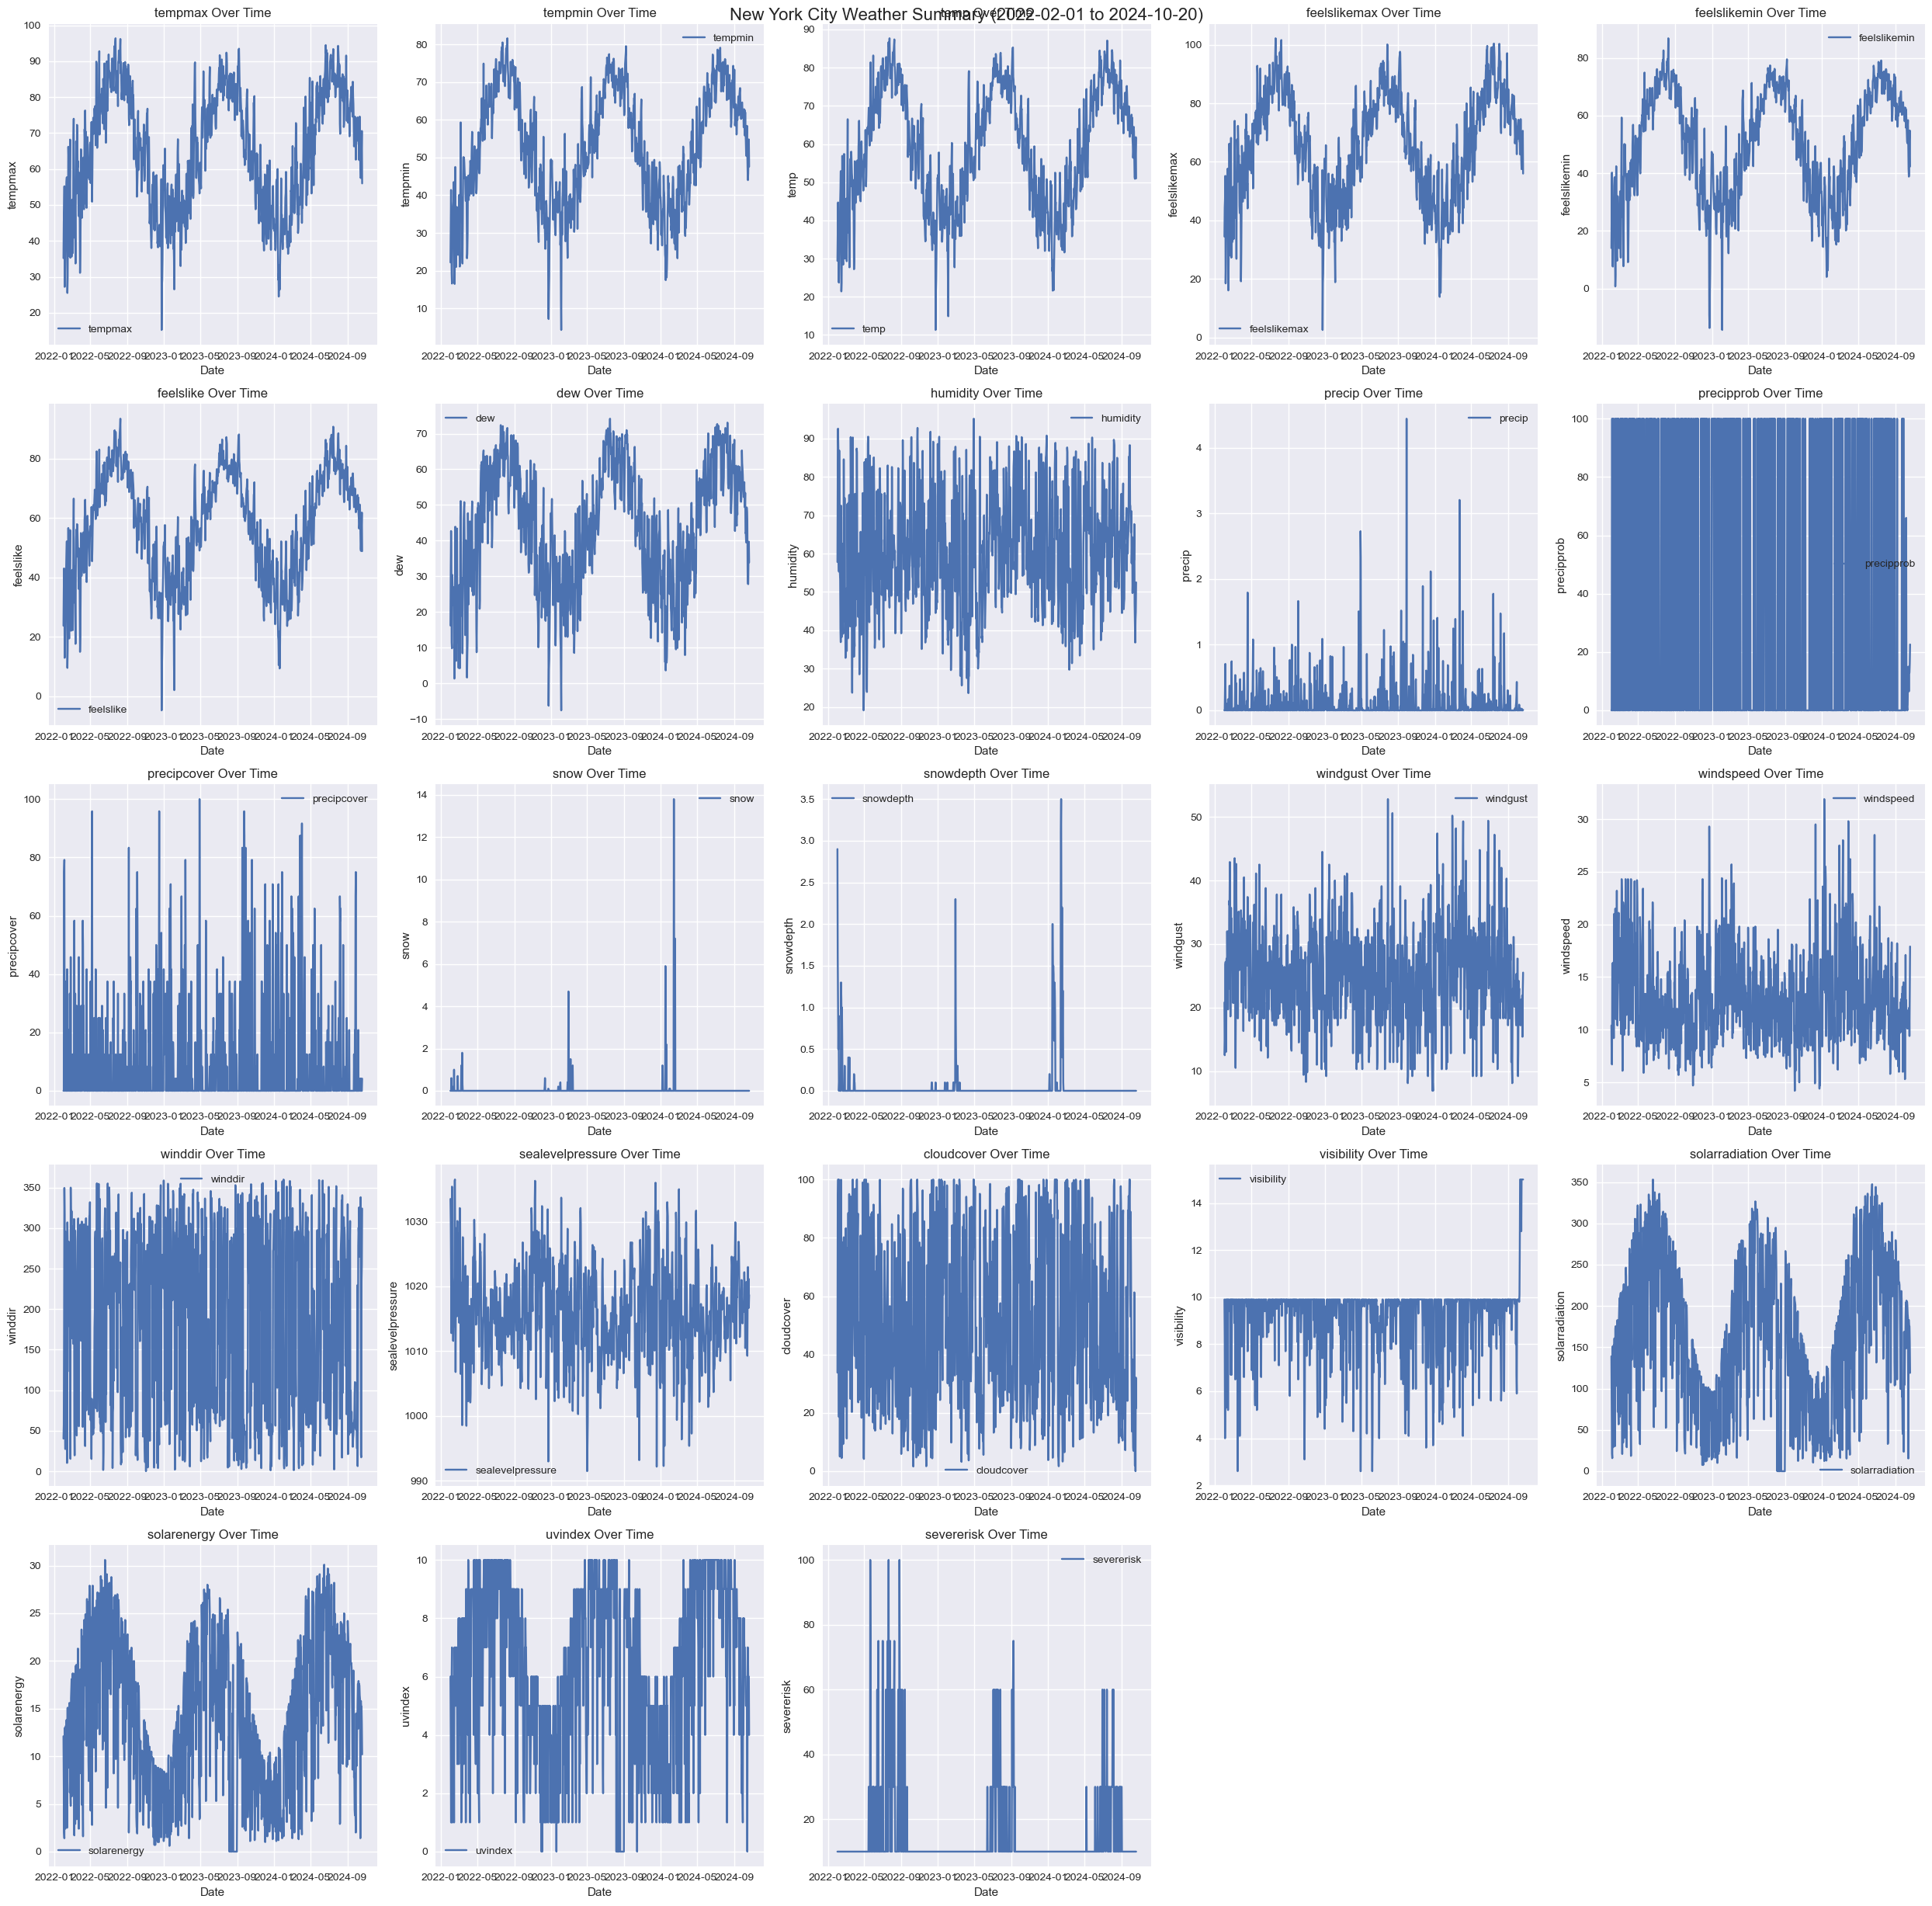

          tempmax     tempmin        temp  feelslikemax  feelslikemin  \
count  993.000000  993.000000  993.000000    993.000000    993.000000   
mean    65.755086   52.743605   58.925881     65.337764     50.045921   
std     16.326140   15.237509   15.468760     18.122028     18.520470   
min     15.200000    4.300000   11.300000      2.600000    -14.400000   
25%     53.000000   40.500000   46.500000     53.000000     35.300000   
50%     67.100000   52.800000   59.600000     67.100000     52.800000   
75%     79.800000   66.100000   72.700000     79.800000     66.100000   
max     96.400000   81.600000   87.700000    102.200000     86.800000   

        feelslike         dew    humidity      precip  precipprob  ...  \
count  993.000000  993.000000  993.000000  993.000000  993.000000  ...   
mean    57.444209   43.856697   60.149648    0.124896   38.962638  ...   
std     17.949624   17.178481   14.971079    0.334507   48.657614  ...   
min     -4.800000   -7.600000   19.100000    0

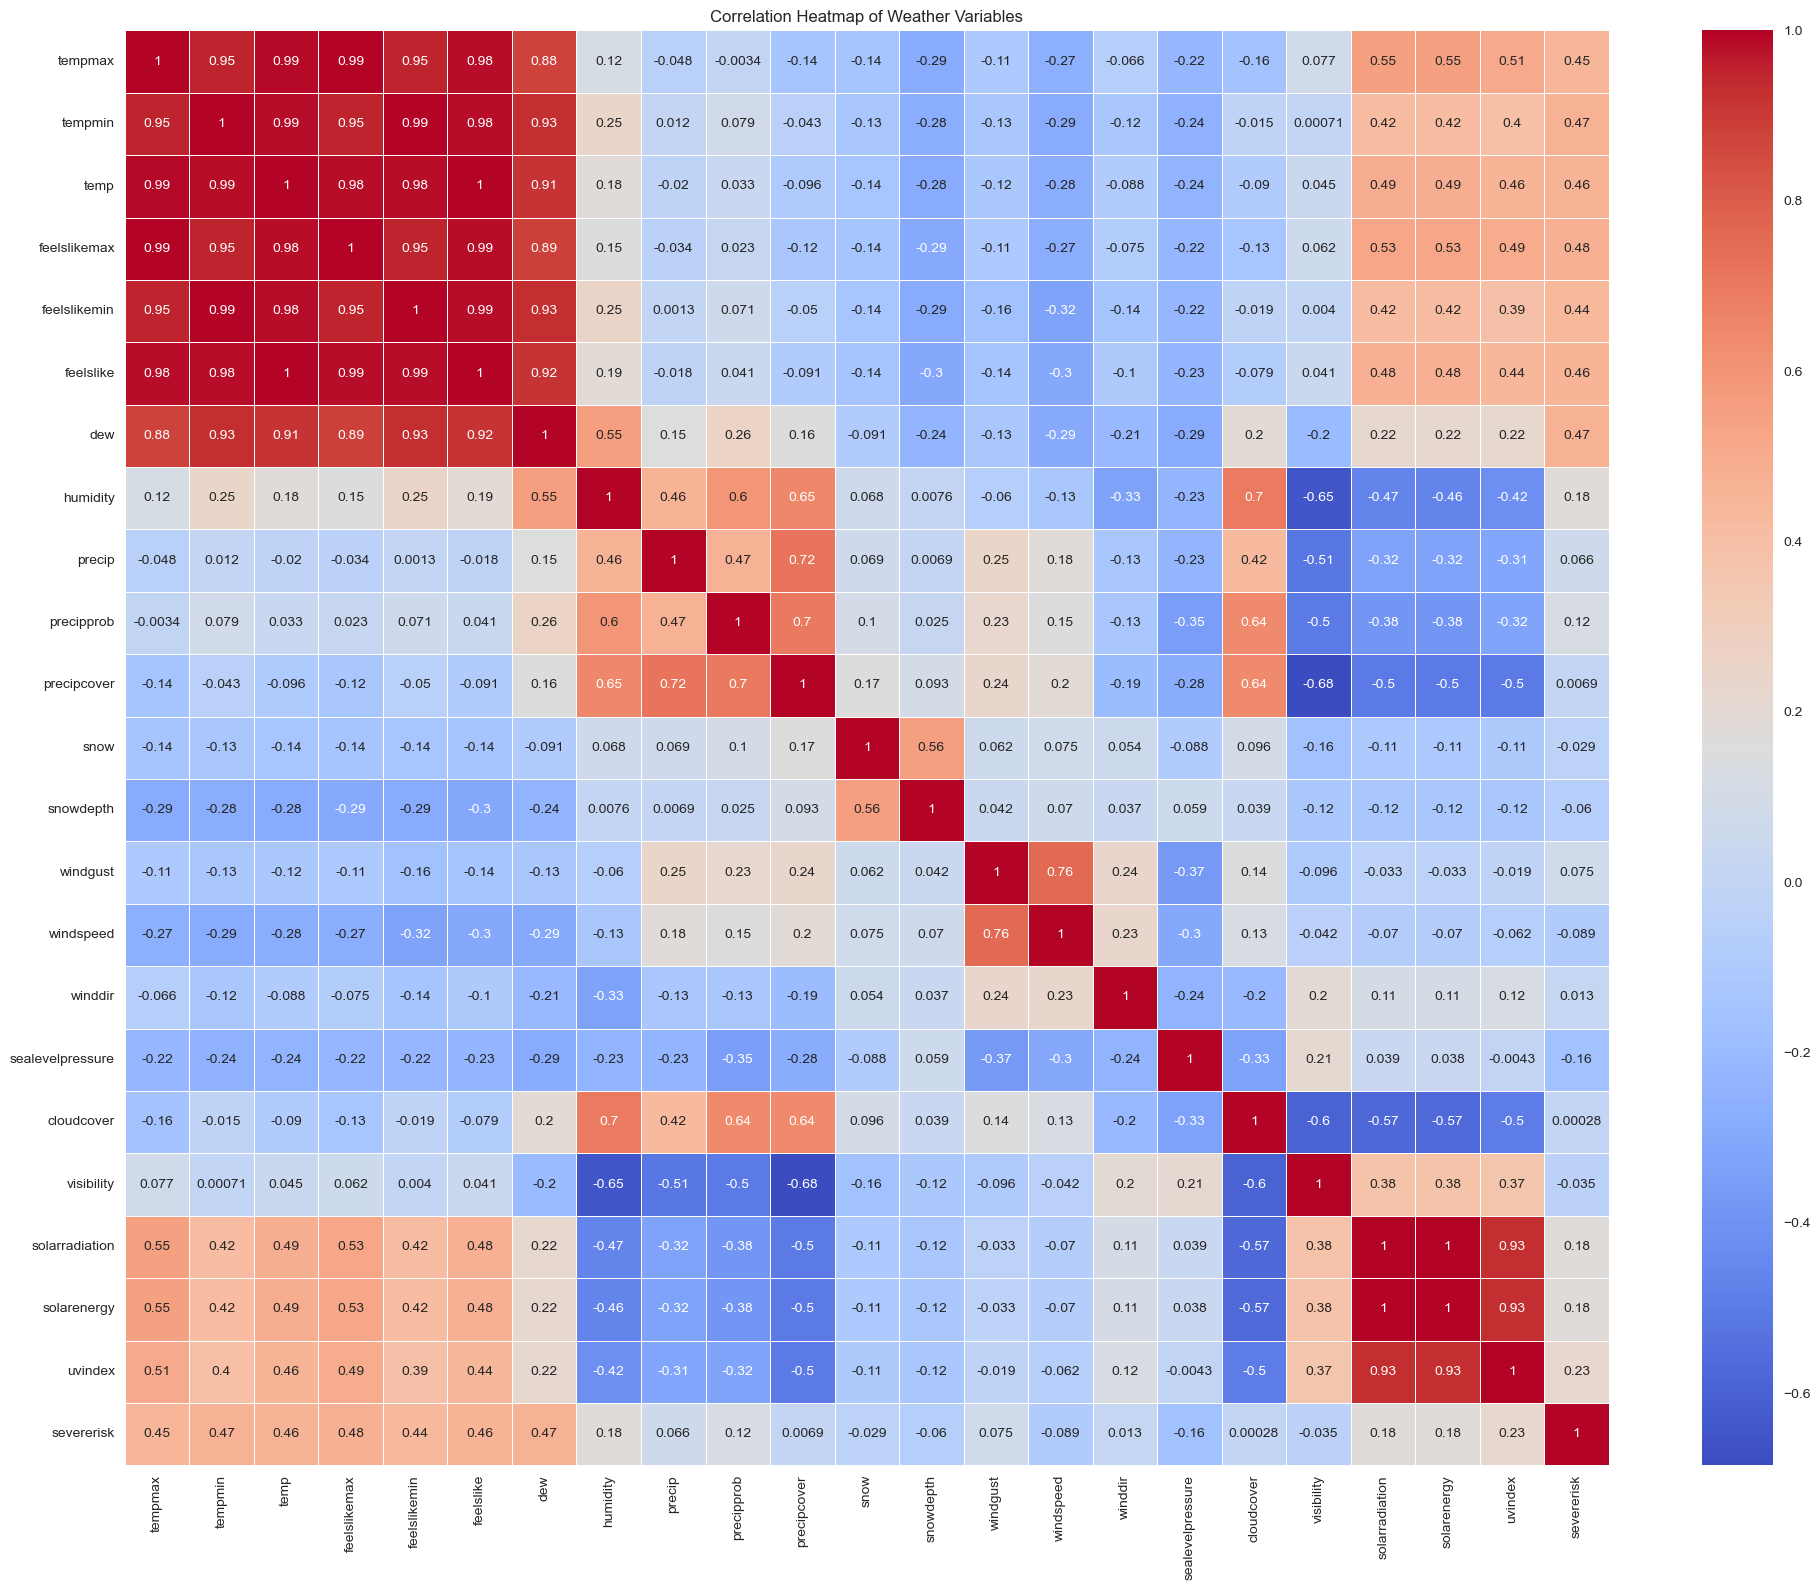


Highly correlated weather variables (correlation > 0.8 or < -0.8):
tempmin and tempmax: 0.95
temp and tempmax: 0.99
temp and tempmin: 0.99
feelslikemax and tempmax: 0.99
feelslikemax and tempmin: 0.95
feelslikemax and temp: 0.98
feelslikemin and tempmax: 0.95
feelslikemin and tempmin: 0.99
feelslikemin and temp: 0.98
feelslikemin and feelslikemax: 0.95
feelslike and tempmax: 0.98
feelslike and tempmin: 0.98
feelslike and temp: 1.00
feelslike and feelslikemax: 0.99
feelslike and feelslikemin: 0.99
dew and tempmax: 0.88
dew and tempmin: 0.93
dew and temp: 0.91
dew and feelslikemax: 0.89
dew and feelslikemin: 0.93
dew and feelslike: 0.92
solarenergy and solarradiation: 1.00
uvindex and solarradiation: 0.93
uvindex and solarenergy: 0.93


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read the weather data
weather_file = os.path.join('..', 'assets', 'new york city 2022-02-01 to 2024-10-20.csv')
weather_data = pd.read_csv(weather_file)

# Convert 'datetime' column to datetime type
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Set the style for the plots
plt.style.use('seaborn')

# List of all weather variables to analyze
weather_vars = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 
                'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 
                'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 
                'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk']

# Create a figure with subplots
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
fig.suptitle('New York City Weather Summary (2022-02-01 to 2024-10-20)', fontsize=16)

# Flatten the axs array for easier iteration
axs_flat = axs.flatten()

# Plot each weather variable
for i, var in enumerate(weather_vars):
    if i < len(axs_flat):
        axs_flat[i].plot(weather_data['datetime'], weather_data[var], label=var)
        axs_flat[i].set_title(f'{var} Over Time')
        axs_flat[i].set_xlabel('Date')
        axs_flat[i].set_ylabel(var)
        axs_flat[i].legend()

# Remove any unused subplots
for i in range(len(weather_vars), len(axs_flat)):
    fig.delaxes(axs_flat[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print summary statistics for all weather variables
print(weather_data[weather_vars].describe())

# Calculate and print correlations between weather variables
correlation_matrix = weather_data[weather_vars].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Variables')
plt.tight_layout()
plt.show()

print("\nHighly correlated weather variables (correlation > 0.8 or < -0.8):")
high_corr = (correlation_matrix.abs() > 0.8) & (correlation_matrix != 1.0)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if high_corr.iloc[i, j]:
            print(f"{correlation_matrix.index[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")


In [26]:


# Merge weather data with combined residuals data
merged_data = pd.merge(residuals_data, weather_data, left_on='Date', right_on='datetime', how='inner')

# Drop the duplicate datetime column
merged_data = merged_data.drop('datetime', axis=1)

# Print the first few rows and info of the merged dataset
print(merged_data.head())
print(merged_data.info())


        Date  Subway Residual  Buses Residual  LIRR Residual           name  \
0 2022-02-01    176341.276018    77923.583782   21073.394905  new york city   
1 2022-02-02    213181.425930   117811.264863   18999.448843  new york city   
2 2022-02-03     35562.316563    31745.948922    -622.807386  new york city   
3 2022-02-04     -8321.644568   -17569.904254   -2035.662366  new york city   
4 2022-02-05     37326.302048    14097.163717    -335.892230  new york city   

   tempmax  tempmin  temp  feelslikemax  feelslikemin  ...  solarenergy  \
0     35.2     22.2  29.4          34.5          14.0  ...         12.1   
1     45.2     31.5  38.1          44.5          26.8  ...          7.3   
2     49.2     41.4  44.7          47.3          40.2  ...          2.0   
3     55.2     27.2  39.3          55.2          17.6  ...          1.4   
4     27.2     19.3  24.1          18.5           7.7  ...         12.8   

   uvindex  severerisk              sunrise               sunset  moonphas


Analyzing Subway


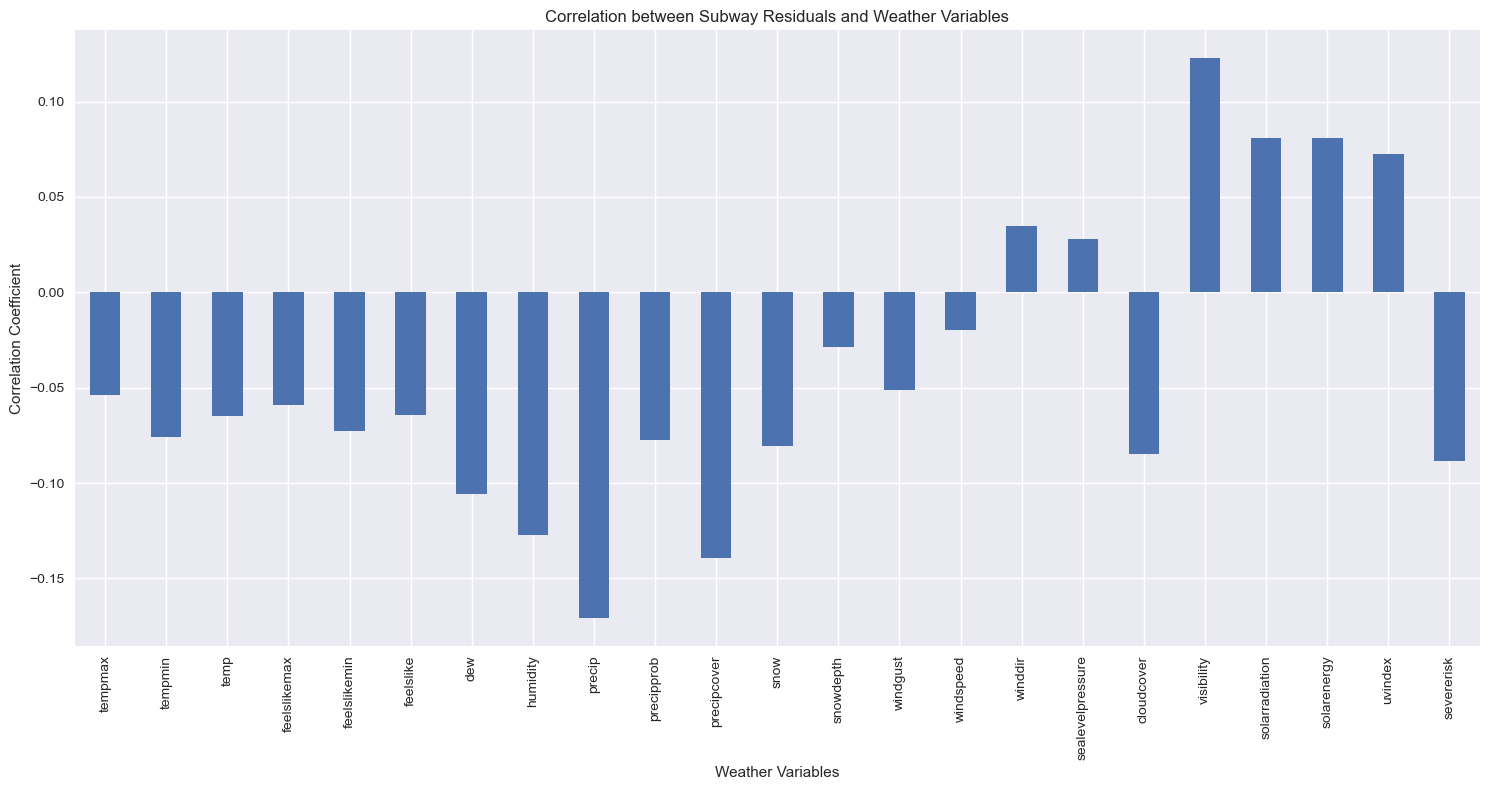

Correlations between Subway residuals and weather variables:
tempmax            -0.053771
tempmin            -0.075744
temp               -0.064780
feelslikemax       -0.059188
feelslikemin       -0.072627
feelslike          -0.064208
dew                -0.105461
humidity           -0.127220
precip             -0.170585
precipprob         -0.077530
precipcover        -0.139498
snow               -0.080593
snowdepth          -0.028702
windgust           -0.051137
windspeed          -0.019902
winddir             0.034718
sealevelpressure    0.028171
cloudcover         -0.084537
visibility          0.122639
solarradiation      0.081062
solarenergy         0.080675
uvindex             0.072594
severerisk         -0.088166
Name: Subway Residual, dtype: float64


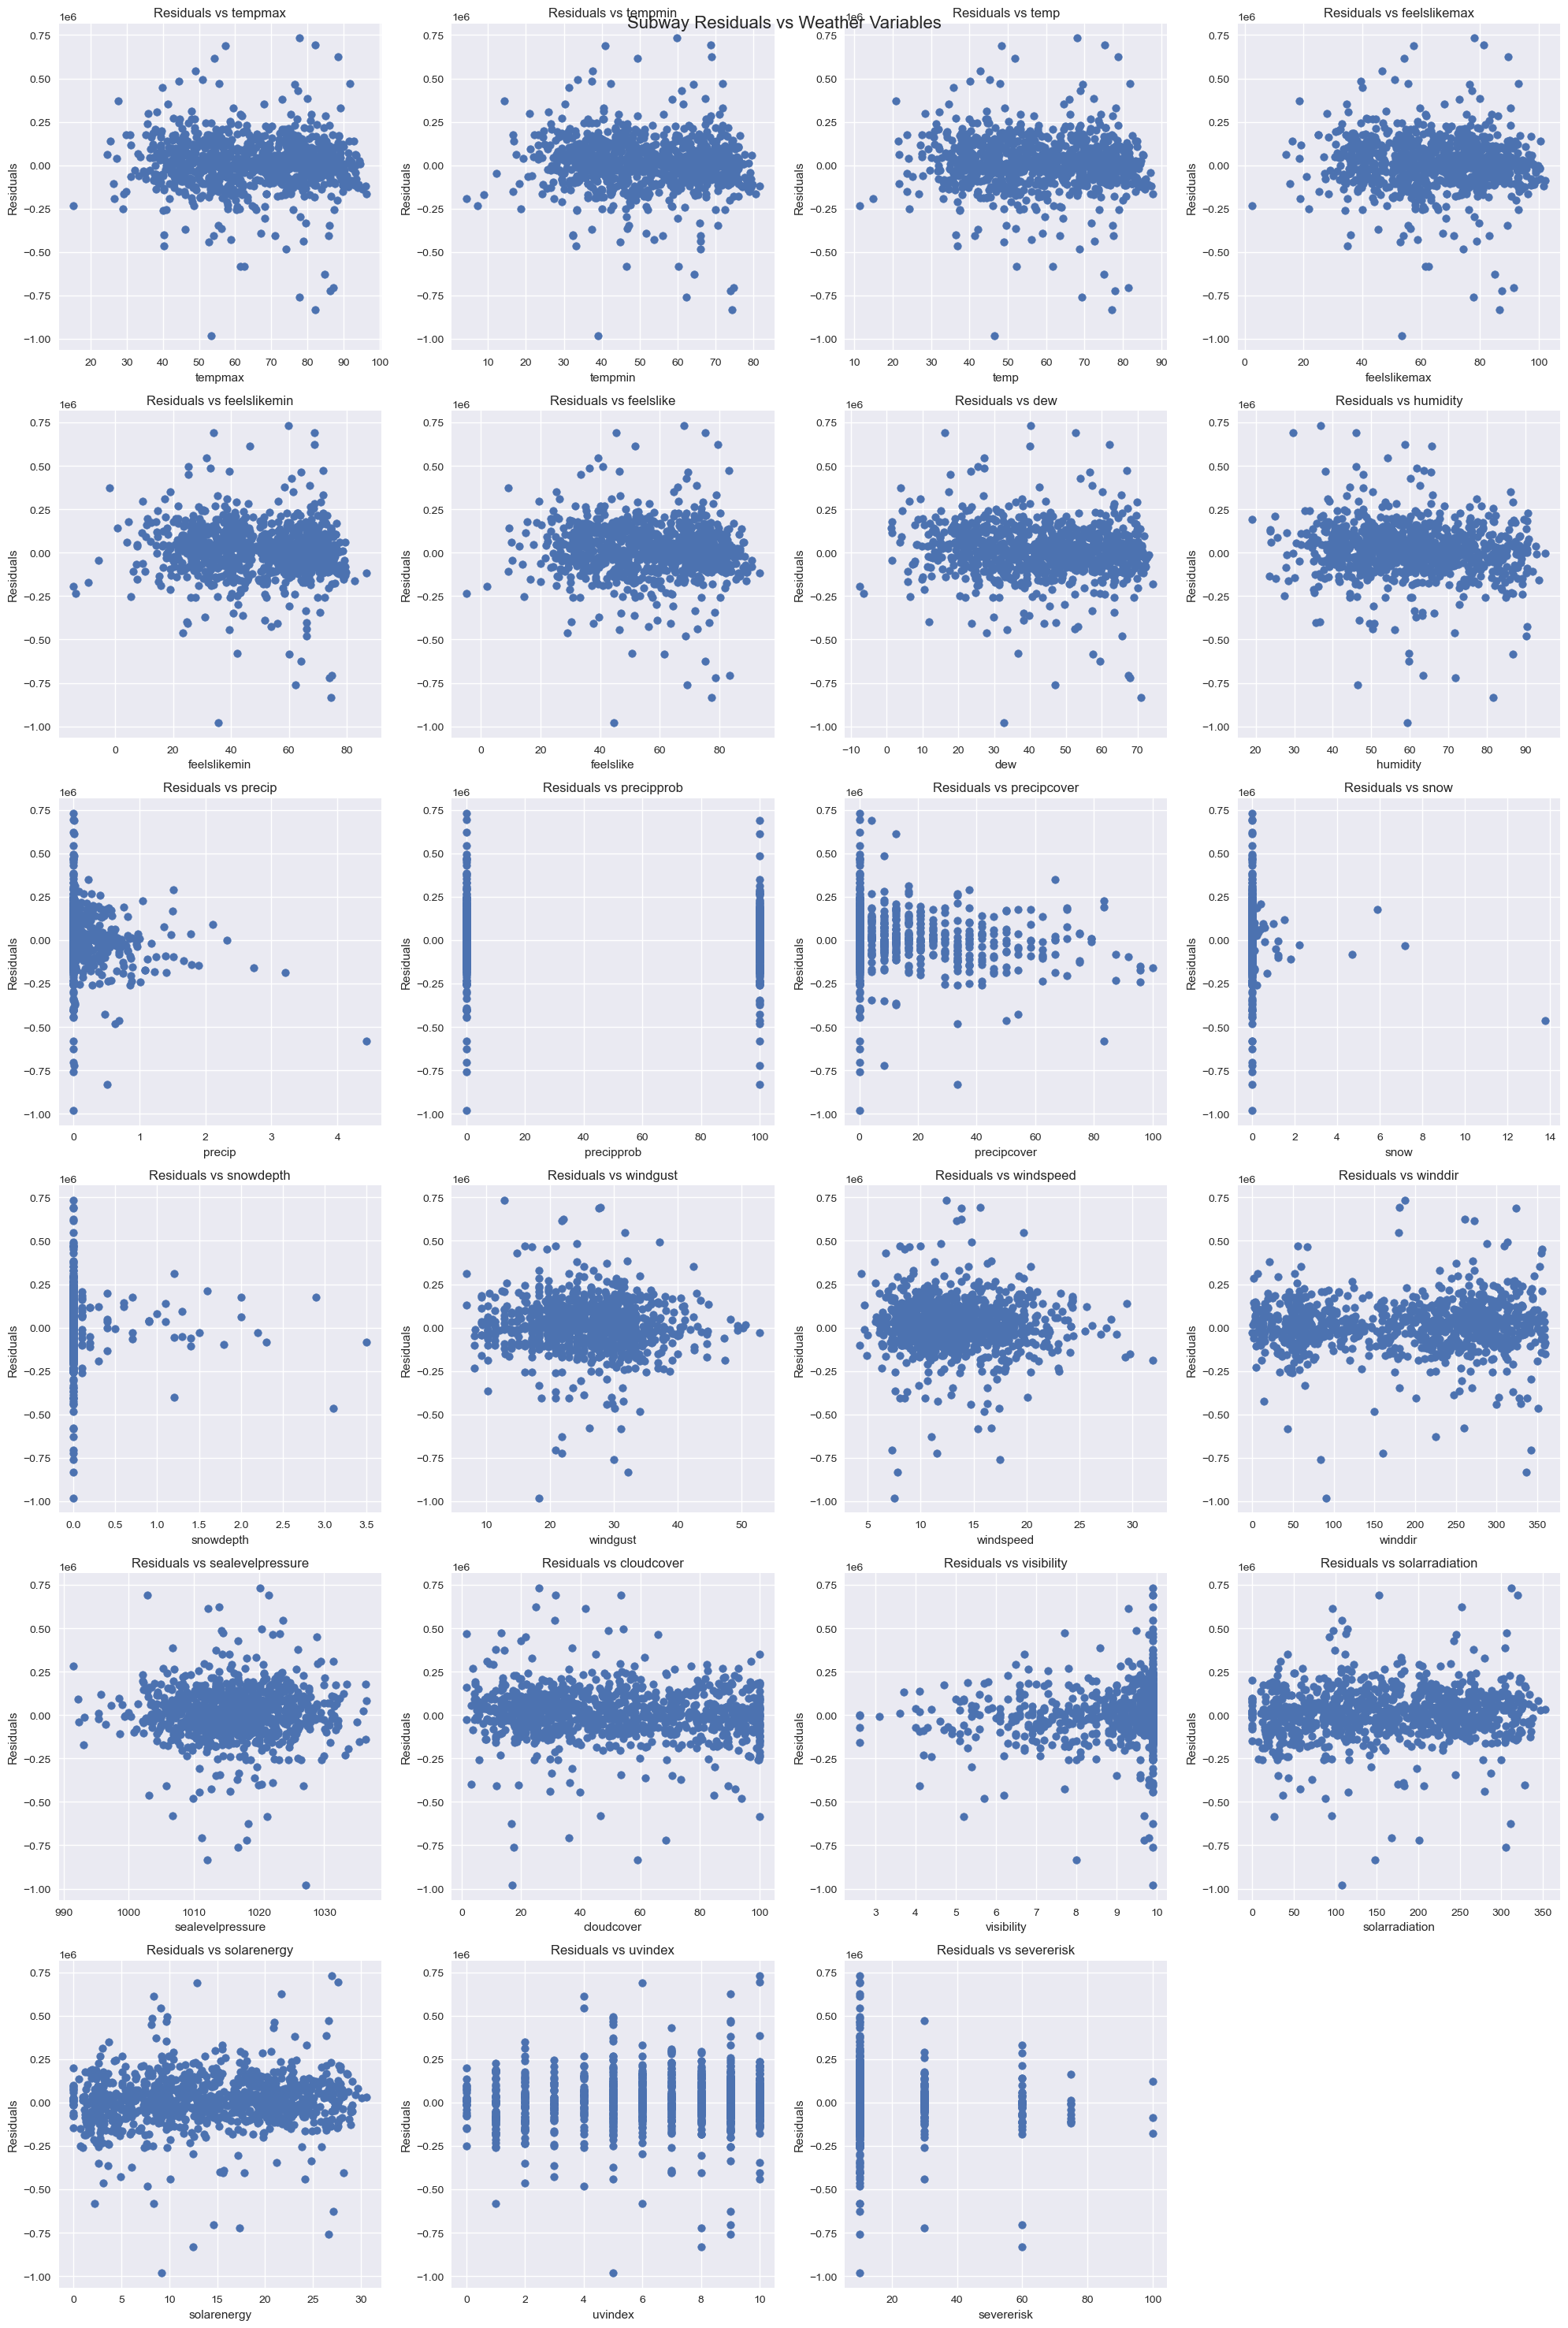


Analyzing Buses


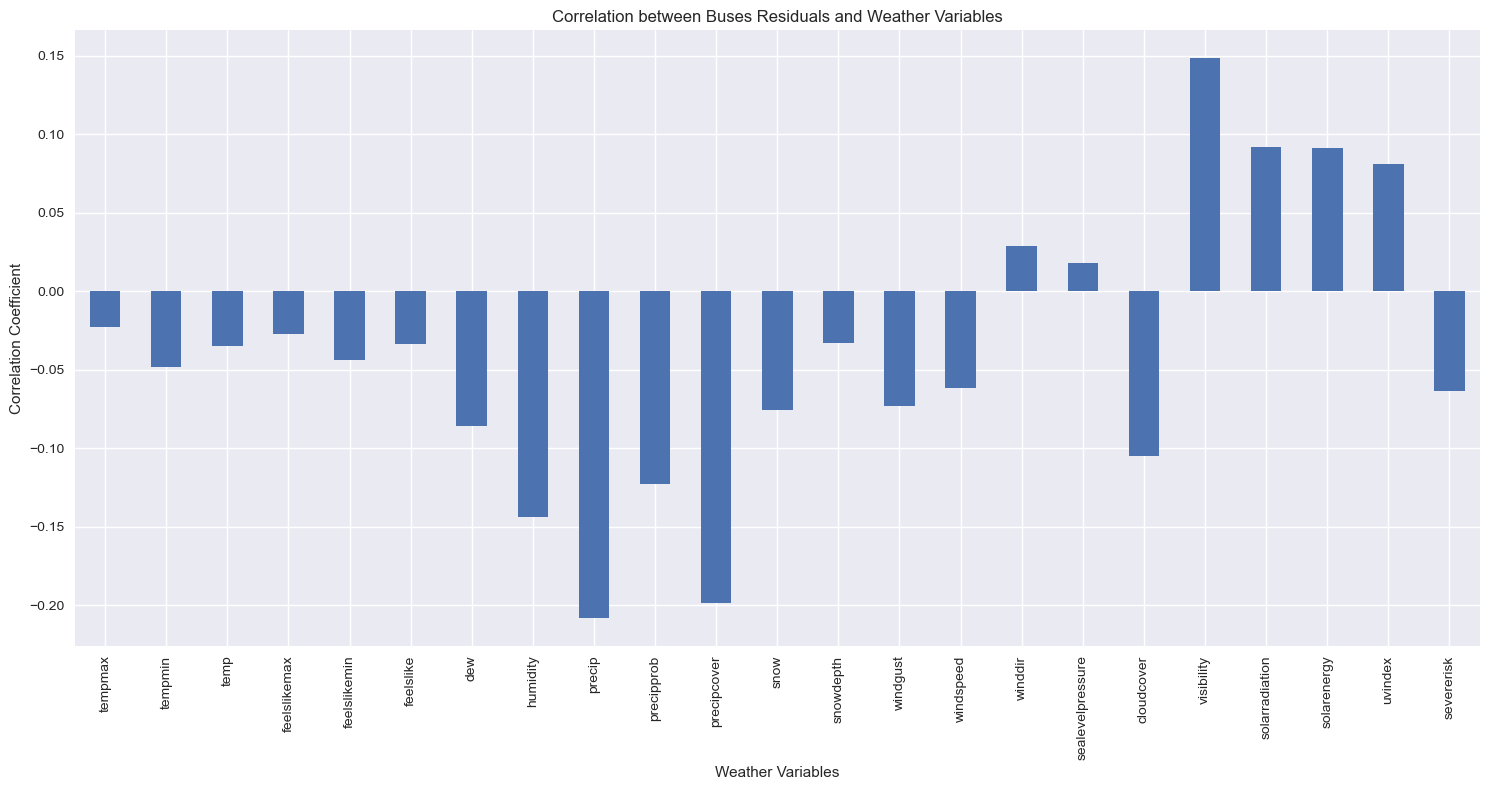

Correlations between Buses residuals and weather variables:
tempmax            -0.022506
tempmin            -0.048467
temp               -0.035068
feelslikemax       -0.027375
feelslikemin       -0.043740
feelslike          -0.033453
dew                -0.085542
humidity           -0.144017
precip             -0.207925
precipprob         -0.123048
precipcover        -0.198792
snow               -0.075522
snowdepth          -0.033159
windgust           -0.072985
windspeed          -0.061733
winddir             0.028808
sealevelpressure    0.017875
cloudcover         -0.104870
visibility          0.148273
solarradiation      0.091918
solarenergy         0.091396
uvindex             0.081014
severerisk         -0.063829
Name: Buses Residual, dtype: float64


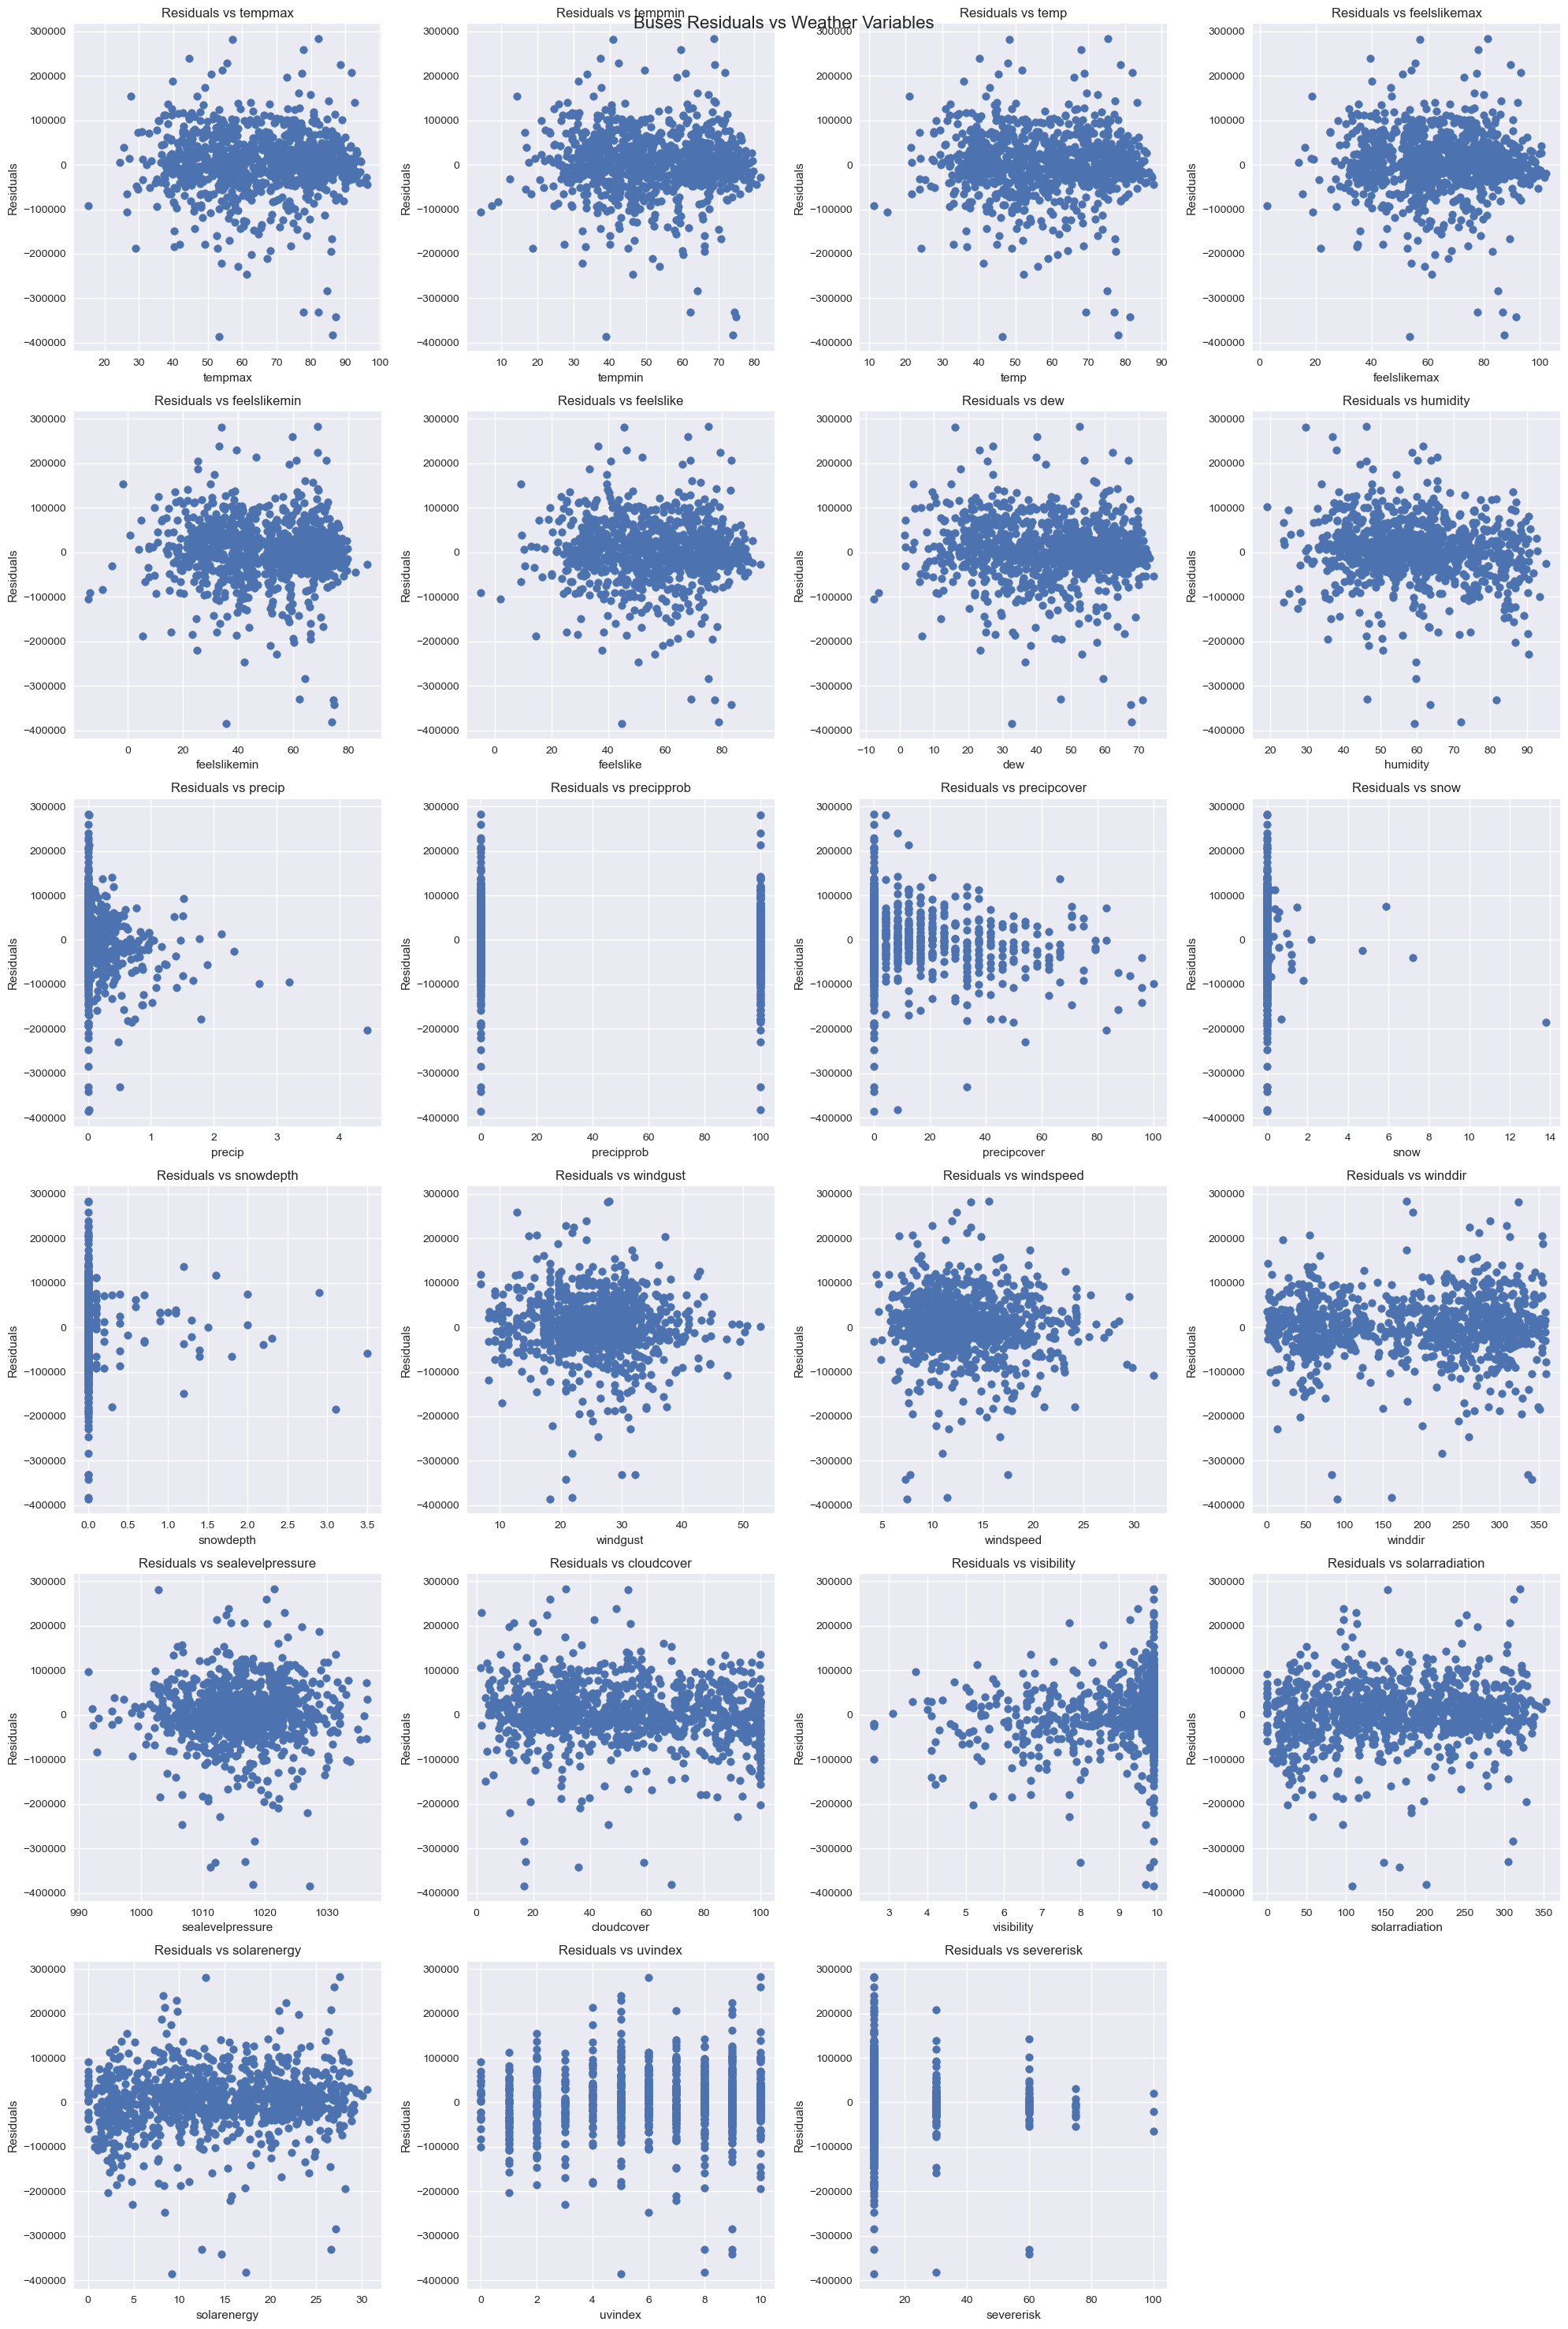


Analyzing LIRR


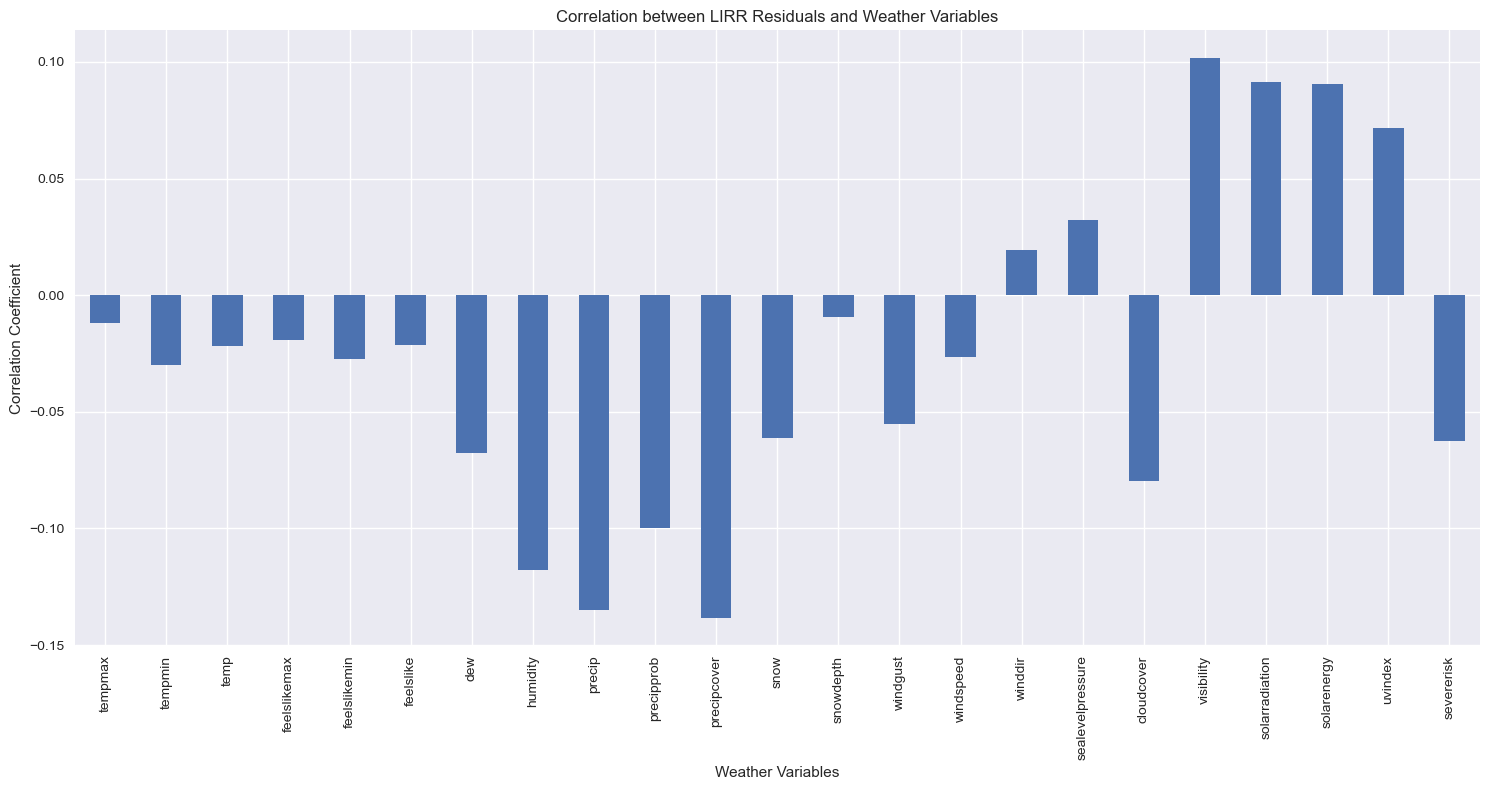

Correlations between LIRR residuals and weather variables:
tempmax            -0.012141
tempmin            -0.030112
temp               -0.021923
feelslikemax       -0.019095
feelslikemin       -0.027551
feelslike          -0.021580
dew                -0.067486
humidity           -0.117721
precip             -0.134851
precipprob         -0.099903
precipcover        -0.138302
snow               -0.061446
snowdepth          -0.009354
windgust           -0.055224
windspeed          -0.026437
winddir             0.019484
sealevelpressure    0.032426
cloudcover         -0.079793
visibility          0.101530
solarradiation      0.091207
solarenergy         0.090631
uvindex             0.071845
severerisk         -0.062515
Name: LIRR Residual, dtype: float64


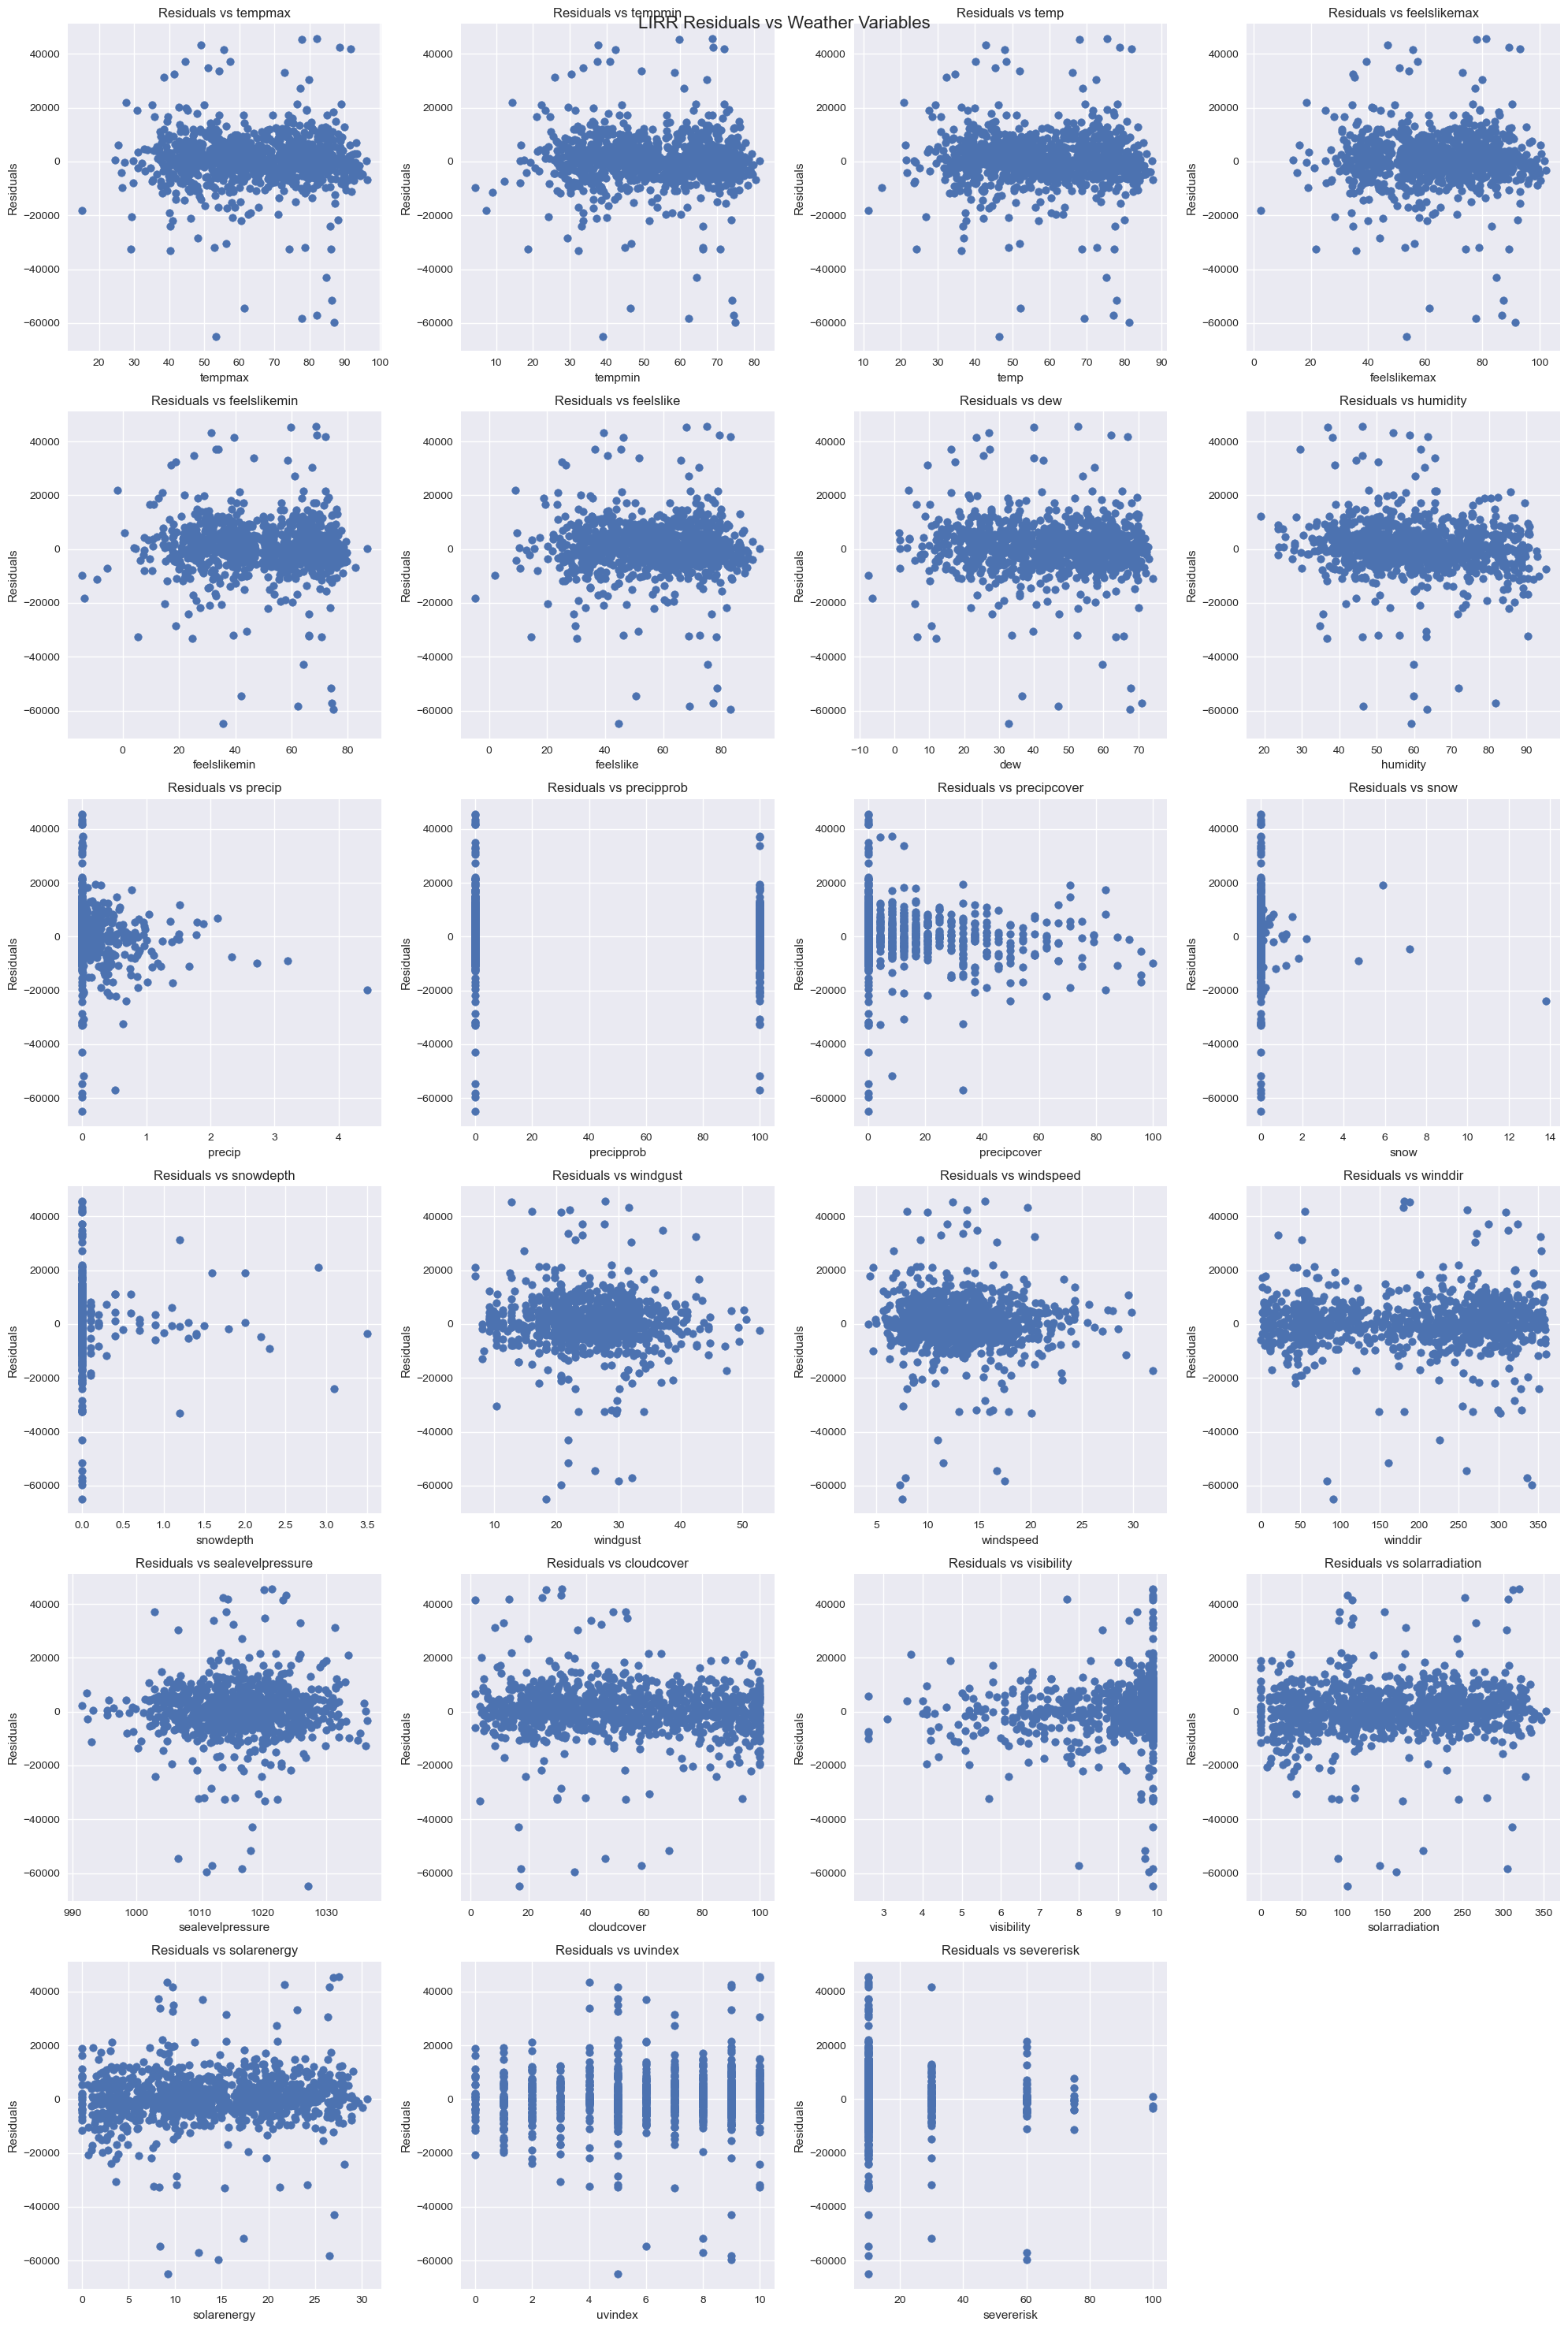

In [29]:
# List of weather variables (excluding preciptype)
weather_vars = [
    'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike',
    'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
    'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
    'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk'
]

# Function to plot correlations and scatter plots for a given mode
def plot_correlations_and_scatter(mode):
    # Calculate correlations between residuals and weather variables
    correlations = merged_data[[f'{mode} Residual'] + weather_vars].corr()[f'{mode} Residual'].drop(f'{mode} Residual')
    
    # Create a bar plot of correlations
    plt.figure(figsize=(15, 8))
    correlations.plot(kind='bar')
    plt.title(f'Correlation between {mode} Residuals and Weather Variables')
    plt.xlabel('Weather Variables')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Print the correlation values
    print(f"Correlations between {mode} residuals and weather variables:")
    print(correlations)
    
    # Scatter plots for each weather variable
    num_vars = len(weather_vars)
    num_cols = 4
    num_rows = (num_vars + num_cols - 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
    fig.suptitle(f'{mode} Residuals vs Weather Variables', fontsize=16)
    
    for i, var in enumerate(weather_vars):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].scatter(merged_data[var], merged_data[f'{mode} Residual'])
        axs[row, col].set_title(f'Residuals vs {var}')
        axs[row, col].set_xlabel(var)
        axs[row, col].set_ylabel('Residuals')
    
    # Remove any unused subplots
    for i in range(num_vars, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axs[row, col])
    
    plt.tight_layout()
    plt.show()

# Analyze correlations for each ridership mode
for mode in ridership_modes:
    print(f"\nAnalyzing {mode}")
    plot_correlations_and_scatter(mode)